### Updating the CONUS projection for a nicer plot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import earthpy.clip as ec

In [3]:
# Get county shapefile
county = gp.read_file("../conus/contig_county/counties_contig.shp")
county["GEOID"] = county["GEOID"].astype(str).str.zfill(5)

In [2]:
states = gp.read_file("../conus/contig_states/CONUS_states.shp")

In [3]:
coast = gp.read_file("../conus_dissolved/usa-boundary-dissolved.shp")

In [5]:
# Update CRS for better US shape
county = county.to_crs({'init': 'epsg:2163'})
coast = coast.to_crs({'init': 'epsg:2163'})
states = states.to_crs({'init': 'epsg:2163'})

# Clip 
county = ec.clip_shp(county, coast.envelope)
county.crs = {'init': 'epsg:2163'}
county = gp.overlay(county, states, how = "intersection")
county = county.filter(["GEOID", "geometry"])

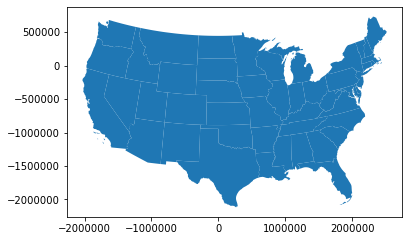

In [7]:
# Check
states.plot()

In [9]:
# Save
states.to_file('./final/states_contig_plot.shp')
coast.to_file('./final/coast_contig_plot.shp')
county.to_file('./final/counties_contig_plot.shp')